<a href="https://colab.research.google.com/github/manujism/Microsoft-Price-Prediction-Using-Linear-Regression/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta
from sklearn import metrics

[*********************100%***********************]  1 of 1 completed


Price            Close
Ticker            MSFT
Date                  
2020-03-31  150.956696
2020-04-01  145.596481
2020-04-02  148.611542
2020-04-03  147.242798
2020-04-06  158.192902


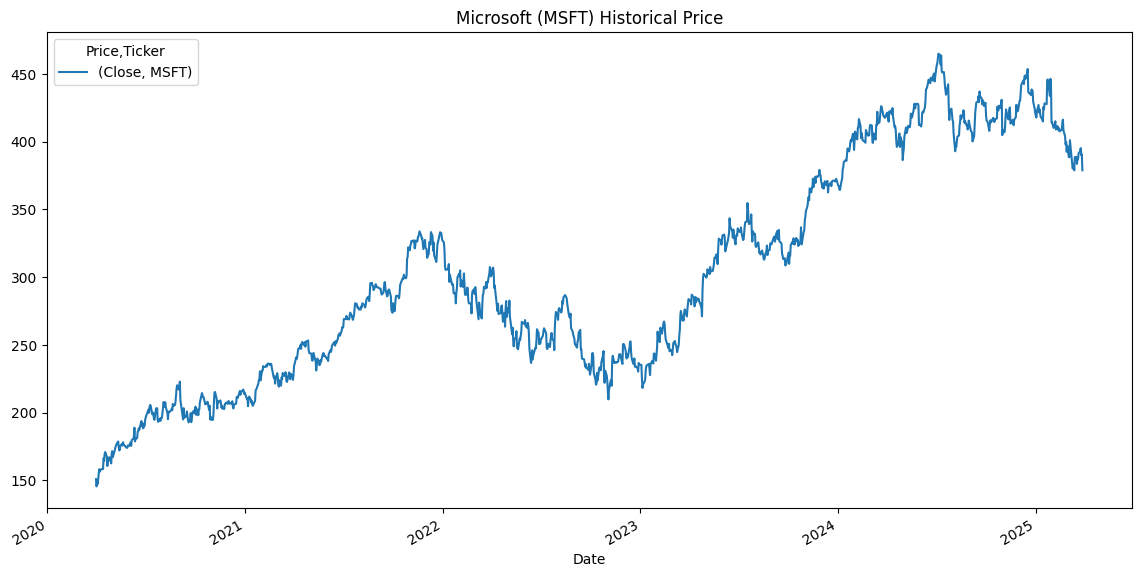

In [9]:
# Define time range
end_date = datetime.today()
start_date = end_date - timedelta(days=365*5)

# Download MSFT data
msft = yf.download('MSFT', start=start_date, end=end_date)
msft = msft[['Close']]
msft.dropna(inplace=True)

print(msft.head())

# Plot raw price
msft[['Close']].plot(figsize=(14, 7))
plt.title('Microsoft (MSFT) Historical Price')


In [11]:
# Create dataframe and convert dates
df = msft[['Close']].reset_index()
msft['Date_ordinal'] = msft.index.map(datetime.toordinal)

In [12]:
# Prepare data for regression
X = msft['Date_ordinal'].values.reshape(-1, 1)
y = msft['Close'].values.reshape(-1, 1)

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Predict
msft['Predicted_Close'] = model.predict(X)


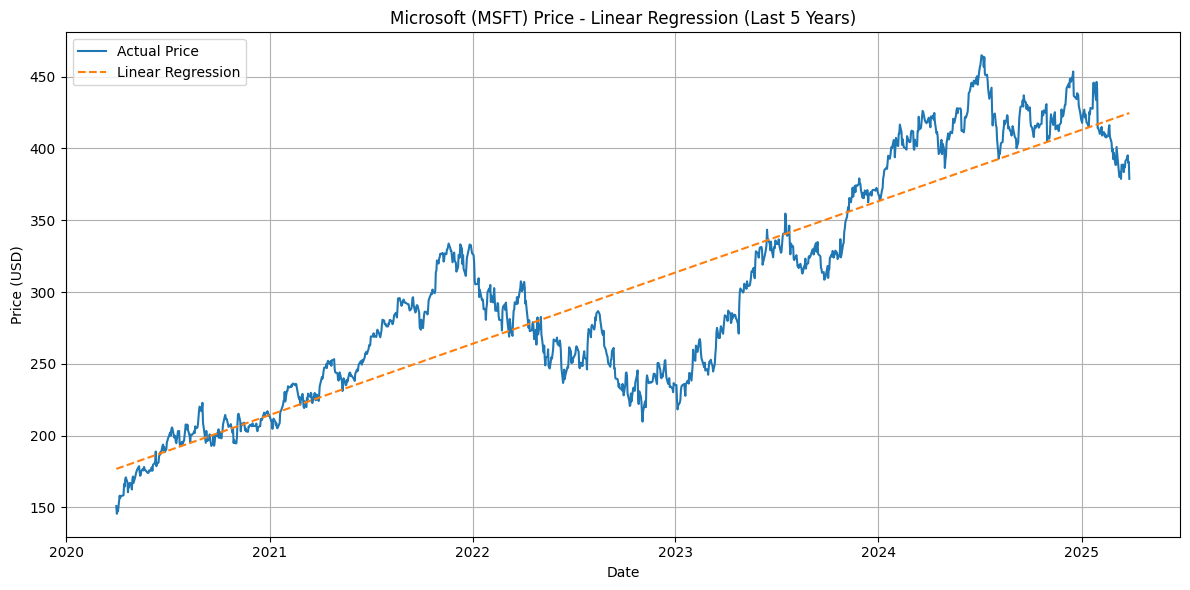

Regression Equation: Price = 0.14 * Date_ordinal + -100044.05


In [13]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(msft.index, msft['Close'], label='Actual Price')
plt.plot(msft.index, msft['Predicted_Close'], label='Linear Regression', linestyle='--')
plt.title('Microsoft (MSFT) Price - Linear Regression (Last 5 Years)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print regression coefficients
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"Regression Equation: Price = {slope:.2f} * Date_ordinal + {intercept:.2f}")
